📌 Project Introduction

In this project, we use three different models to classify images of five different venues: decision tree supervised, decision tree semi-supervised and CNN supervised.
This notebook adress only the first and second models.

📌 Data Set Description

We use 2,960 colorful images categorized into five datasets: bar, beach, store, restaurant, and subway collected from two websites: image.cv and mit.edu. We have eliminated parts of the datasets for having specific classes and also combined datasets.

    Book stores: This class contains 746 images
    bar: This class contains 604 images 
    Subway: This class contains 539 images
    Restaurants: This class contains 449 images
    Beach: This class contains 622 images

📌 In this Project, we will:

    Analyze customer data provided in data set (EDA= exploratory data analysis) 
    Build two models that can classify images

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python-headless imgaug

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dask.diagnostics import ProgressBar
from PIL import Image
import dask.bag as db
import cv2

### Data  preprosessing

📌 Reading Data Set

In [4]:
img_path = 'final_dataset'

In [5]:
number_classes = {
'Classbar': len(os.listdir('final_dataset/bar')),
'Classbeach': len(os.listdir('final_dataset/beach')),
'Classbookstore': len(os.listdir('final_dataset/bookstore')),
'Classrest': len(os.listdir('final_dataset/restaurant')),
'Classsub': len(os.listdir('final_dataset/subway'))}

📌 Data Exploration

[########################################] | 100% Completed | 749.25 ms


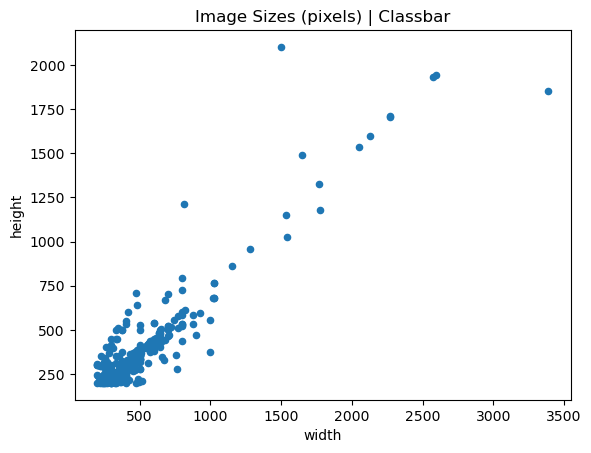

[########################################] | 100% Completed | 440.31 ms


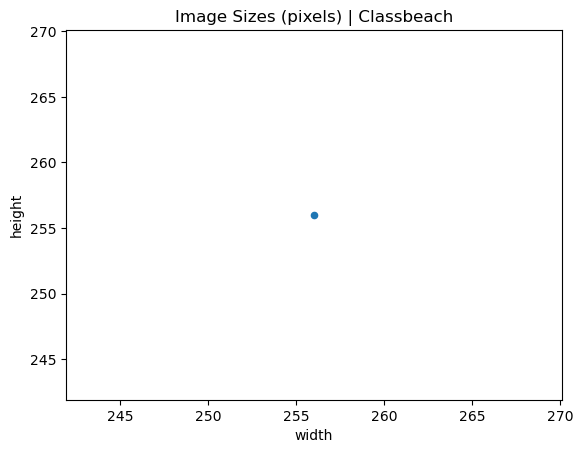

[########################################] | 100% Completed | 429.40 ms


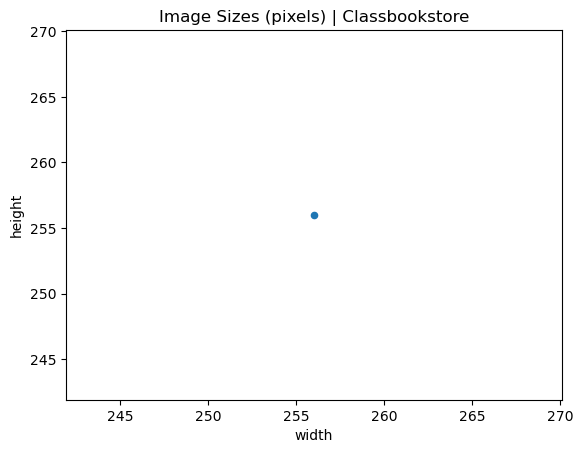

[########################################] | 100% Completed | 423.42 ms


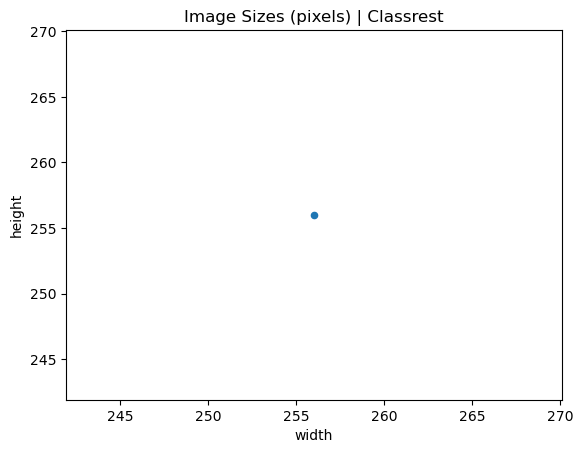

[########################################] | 100% Completed | 424.86 ms


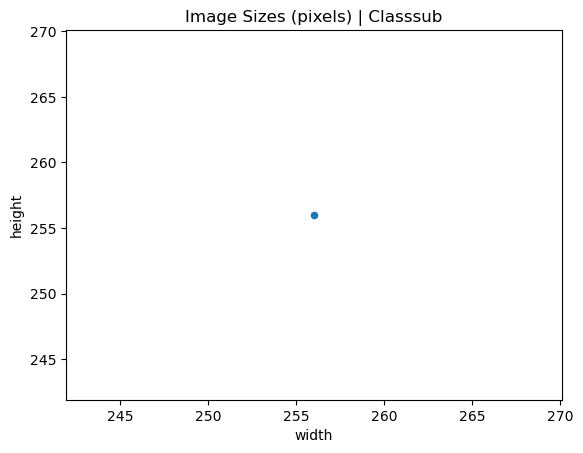

In [6]:
directories = {'Classbar': 'final_dataset/bar',
'Classbeach': 'final_dataset/beach',
'Classbookstore': 'final_dataset/bookstore',
'Classrest': 'final_dataset/restaurant',
'Classsub': 'final_dataset/subway',  }

def get_dims(file):
    im = Image.open(file)
    arr = np.array(im)
    if len(arr.shape) == 2:  
        h, w = arr.shape
    else:  # Color image
        h, w, d = arr.shape
    return h, w

for n, d in directories.items():
    filepath = d
    filelist = [os.path.join(filepath, f) for f in os.listdir(filepath)]
    dims = db.from_sequence(filelist).map(get_dims)

    with ProgressBar():
        dims = dims.compute()

    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0: 'count'})
    sizes.plot.scatter(x='width', y='height')
    plt.title('Image Sizes (pixels) | {}'.format(n))
    plt.show()

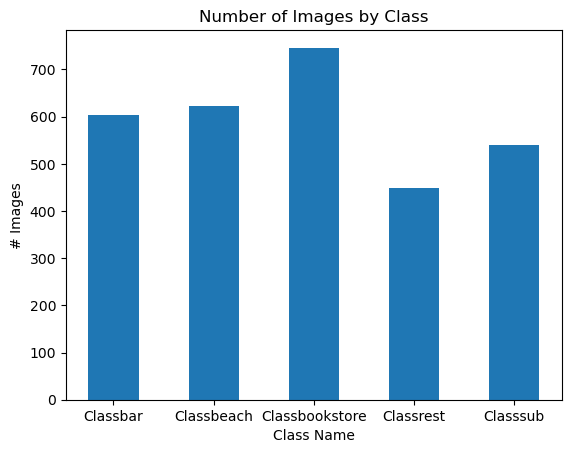

In [7]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

📌 Data Visualisation

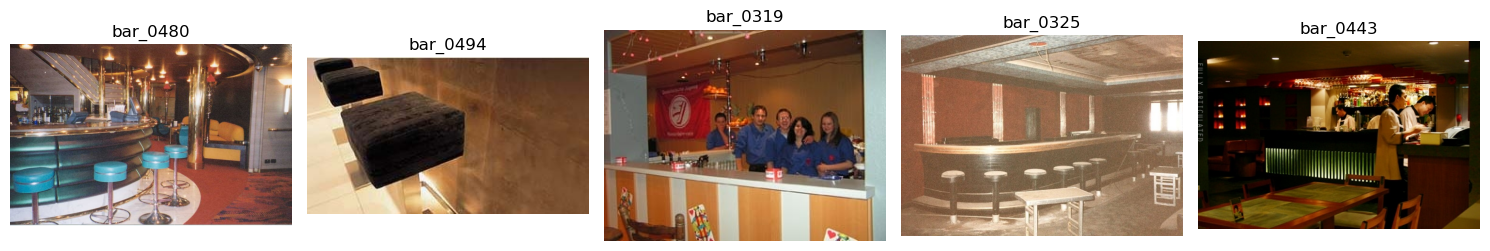

In [8]:
image_path_bar = 'final_dataset/bar'

# Getting a list of all image filenames
image_files = os.listdir(image_path_bar)

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, img_file in enumerate(image_files[:5]):
    img = Image.open(os.path.join(image_path_bar, img_file))
    axes[i].imshow(img)
    axes[i].set_title(img_file.split('.')[0])  
    axes[i].axis('off')

plt.tight_layout()
plt.show()

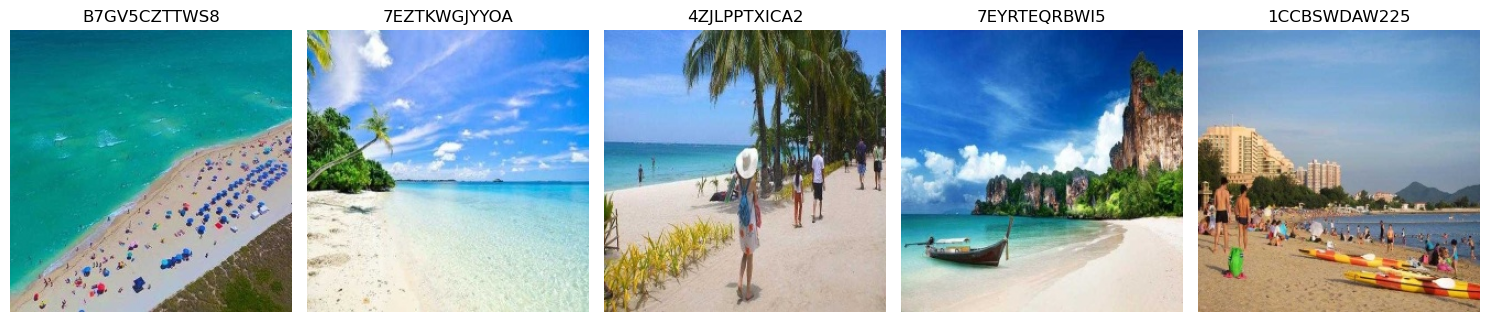

In [9]:
image_path_beach = 'final_dataset/beach'

image_files = os.listdir(image_path_beach)

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, img_file in enumerate(image_files[:5]):
    img = Image.open(os.path.join(image_path_beach, img_file))
    axes[i].imshow(img)
    axes[i].set_title(img_file.split('.')[0]) 
    axes[i].axis('off')

plt.tight_layout()
plt.show()

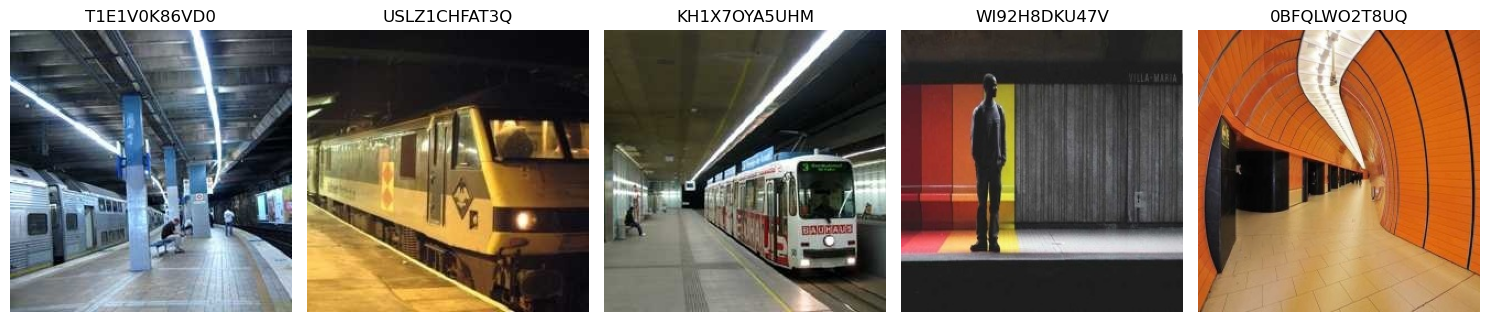

In [10]:
image_path_sub = 'final_dataset/subway'

image_files = os.listdir(image_path_sub)

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, img_file in enumerate(image_files[:5]):
    img = Image.open(os.path.join(image_path_sub, img_file))
    axes[i].imshow(img)
    axes[i].set_title(img_file.split('.')[0])  
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Here are the first five images from the bar,  beach and subway dataset. As we can observe, the images seem to have different dimensions and backgrounds.

📌 Data Cleaning

In this part, we go through every class and make sure that we dont have  any duplicated images.

In [11]:
import imagehash

image_folder='final_dataset'

bar_folder= 'final_dataset/bar'
restaurant_folder='final_dataset/restaurant'
subway_folder = 'final_dataset/subway'
bookstore_folder='final_dataset/bookstore'
beach_folder='final_dataset/beach'

def find_duplicates(image_folder):
    
    image_hashes = {}
    duplicates = []

    for filename in (image_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            filepath = os.path.join(image_folder, filename)
            with Image.open(filepath) as img:
                hash_value = imagehash.average_hash(img)
                if hash_value in image_hashes:
                    duplicates.append((filepath, image_hashes[hash_value]))
                else:
                    image_hashes[hash_value] = filepath

    return duplicates

In [12]:
def check_duplicates(bar_folder, restaurant_folder,subway_folder,beach_folder,bookstore_folder):
   #for the bar
    
    print("Checking for duplicates in bar pictures")
    bar_duplicates = find_duplicates(bar_folder)
    if bar_duplicates:
        print("Found duplicates in bar pictures:")
        for dup in bar_duplicates:
            print(f"Duplicate pair: {dup[0]} and {dup[1]}")
    else:
        print("No duplicates found in bar pictures.")


    #for the restaurants
    print("\nChecking for duplicates in restaurant pictures")
    restaurant_duplicates = find_duplicates(restaurant_folder)
    if restaurant_duplicates:
        print("Found duplicates in restaurant pictures:")
        for dup in restaurant_duplicates:
            print(f"Duplicate pair: {dup[0]} and {dup[1]}")
    else:
        print("No duplicates found in restaurant pictures.")

    #for the bookstore
    print("\nChecking for duplicates in bookstore pictures")
    bookstore_duplicates = find_duplicates(bookstore_folder)
    if bookstore_duplicates:
        print("Found duplicates in bookstore pictures:")
        for dup in bookstore_duplicates:
            print(f"Duplicate pair: {dup[0]} and {dup[1]}")
    else:
        print("No duplicates found in bookstore pictures.")


    #for the beach
    print("\nChecking for duplicates in beach pictures")
    beach_duplicates = find_duplicates(beach_folder)
    if beach_duplicates:
        print("Found duplicates in beach pictures:")
        for dup in beach_duplicates:
            print(f"Duplicate pair: {dup[0]} and {dup[1]}")
    else:
        print("No duplicates found in beach pictures.")


    #forr the subway
    print("\nChecking for duplicates in subway pictures")
    subway_duplicates = find_duplicates(subway_folder)
    if subway_duplicates:
        print("Found duplicates in subway pictures:")
        for dup in subway_duplicates:
            print(f"Duplicate pair: {dup[0]} and {dup[1]}")
    else:
        print("No duplicates found in subway pictures.")

check_duplicates(bar_folder, restaurant_folder,subway_folder,beach_folder,bookstore_folder)

Checking for duplicates in bar pictures
No duplicates found in bar pictures.

Checking for duplicates in restaurant pictures
No duplicates found in restaurant pictures.

Checking for duplicates in bookstore pictures
No duplicates found in bookstore pictures.

Checking for duplicates in beach pictures
No duplicates found in beach pictures.

Checking for duplicates in subway pictures
No duplicates found in subway pictures.


Going  throuugh the 5 files, no images were duplicated

📌 Image resizing to 256x256

In [13]:
import os
import cv2

directories = {'class_bar': 'final_dataset/bar'}

for n, d in directories.items():
    filepath = d
    filelist = [os.path.join(filepath, f) for f in os.listdir(filepath)]
    for file in filelist:
        image = cv2.imread(file)
        if image is None:
            print("Error ::: Image not found or bad image: " + file)
        else:
            height, width = image.shape[:2]
            if height != 256 or width != 256:
                print("Resizing image: " + file)
                resized_image = cv2.resize(image, (256, 256))
                new_file_name = os.path.join('final_dataset/bar', os.path.basename(file))
                print("Writing resized image: " + new_file_name)
                cv2.imwrite(new_file_name, resized_image)


Resizing image: final_dataset/bar/bar_0480.jpg
Writing resized image: final_dataset/bar/bar_0480.jpg
Resizing image: final_dataset/bar/bar_0494.jpg
Writing resized image: final_dataset/bar/bar_0494.jpg
Resizing image: final_dataset/bar/bar_0319.jpg
Writing resized image: final_dataset/bar/bar_0319.jpg
Resizing image: final_dataset/bar/bar_0325.jpg
Writing resized image: final_dataset/bar/bar_0325.jpg
Resizing image: final_dataset/bar/bar_0443.jpg
Writing resized image: final_dataset/bar/bar_0443.jpg
Resizing image: final_dataset/bar/bar_0457.jpg
Writing resized image: final_dataset/bar/bar_0457.jpg
Resizing image: final_dataset/bar/bar_0331.jpg
Writing resized image: final_dataset/bar/bar_0331.jpg
Resizing image: final_dataset/bar/bar_0127.jpg
Writing resized image: final_dataset/bar/bar_0127.jpg
Resizing image: final_dataset/bar/bar_0133.jpg
Writing resized image: final_dataset/bar/bar_0133.jpg
Resizing image: final_dataset/bar/bar_0090.jpg
Writing resized image: final_dataset/bar/bar

[########################################] | 100% Completed | 441.04 ms


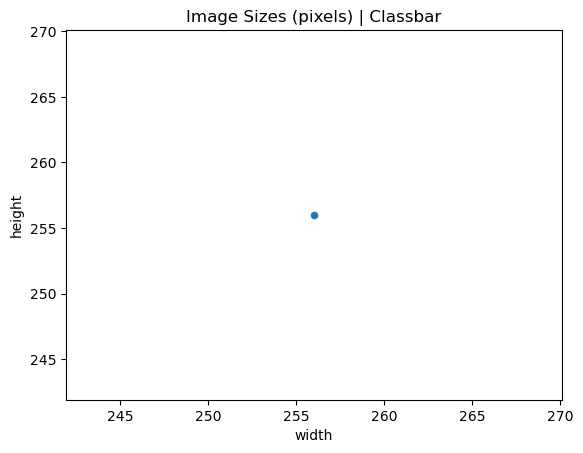

In [14]:
directories = {'Classbar': 'final_dataset/bar',
  }

def get_dims(file):
    im = Image.open(file)
    arr = np.array(im)
    if len(arr.shape) == 2:  
        h, w = arr.shape
    else:  # Color image
        h, w, d = arr.shape
    return h, w

for n, d in directories.items():
    filepath = d
    filelist = [os.path.join(filepath, f) for f in os.listdir(filepath)]
    dims = db.from_sequence(filelist).map(get_dims)

    with ProgressBar():
        dims = dims.compute()

    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0: 'count'})
    sizes.plot.scatter(x='width', y='height')
    plt.title('Image Sizes (pixels) | {}'.format(n))
    plt.show()

📌 Data Augmentation

In [15]:
pip install imgaug

Note: you may need to restart the kernel to use updated packages.


In [16]:
import imgaug.augmenters as iaa

original_dir = 'final_dataset/restaurant'
augmented_dir = 'final_dataset/restaurant_augmented'

os.makedirs(augmented_dir, exist_ok=True)

filelist = [os.path.join(original_dir, f) for f in os.listdir(original_dir) if f.endswith('.jpg')]

# Define augmentation sequence
augmentation_seq = iaa.Sequential([
    iaa.Fliplr(0.5),        # Horizontal flip
    iaa.Flipud(0.5),        # Vertical flip
    iaa.Affine(rotate=(-25, 25)), # Rotate
    iaa.Multiply((0.8, 1.2)), # Change brightness
    iaa.GaussianBlur(sigma=(0, 3.0)) # Gaussian blur
])

#save augmented images
def save_augmented_images(images, base_name, start_index, dir_path):
    for i, img in enumerate(images):
        new_file_name = os.path.join(dir_path, f'{base_name}_aug_{start_index + i}.jpg')
        cv2.imwrite(new_file_name, img)

# Augment images until the total count is 640
total_images = len(filelist)
current_count = 0
augmentation_round = 1

while current_count < 640:
    for file in filelist:
        image = cv2.imread(file)
        if image is not None:
            augmented_images = augmentation_seq(images=[image]*5) 
            
            base_name = os.path.splitext(os.path.basename(file))[0]
            save_augmented_images(augmented_images, base_name, current_count, augmented_dir)
            
            current_count += len(augmented_images)
            if current_count >= 600:
                break
        else:
            print(f"Error: Unable to read image {file}")
    augmentation_round += 1

print("Data augmentation complete. Total images:", current_count)

Data augmentation complete. Total images: 640


In [17]:
number_classes = {
'Classbar': len(os.listdir('final_dataset/bar')),
'Classbeach': len(os.listdir('final_dataset/beach')),
'Classbookstore': len(os.listdir('final_dataset/bookstore')),
'AugRestau': len(os.listdir('final_dataset/restaurant_augmented'))  ,
'Classsub': len(os.listdir('final_dataset/subway'))}

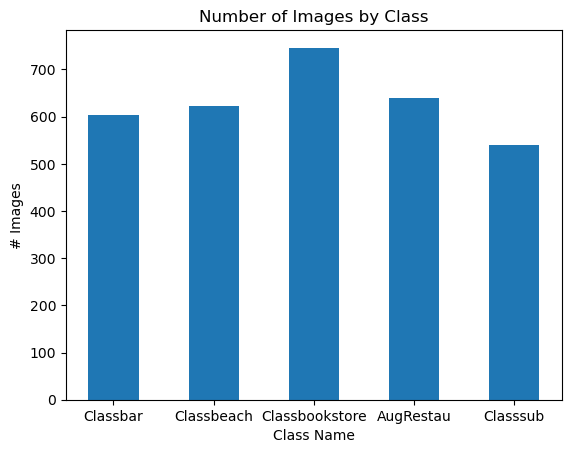

In [18]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

📌 Show Example Augmentated Images

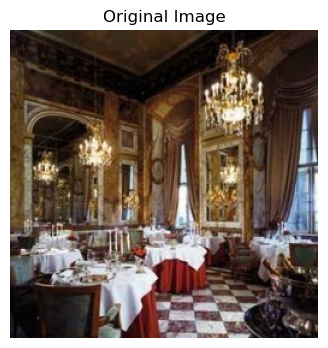

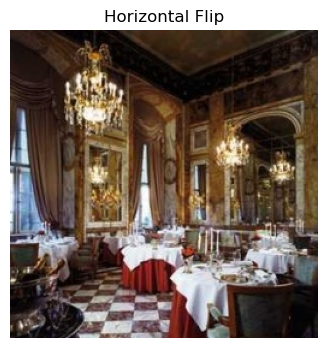

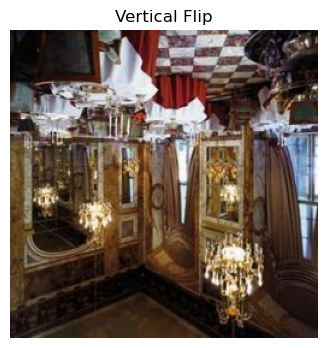

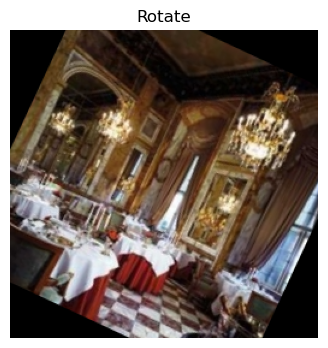

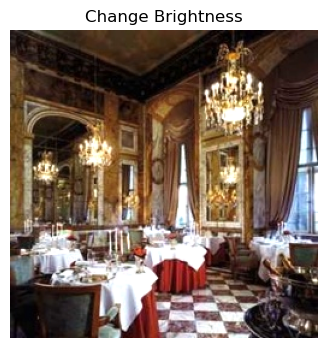

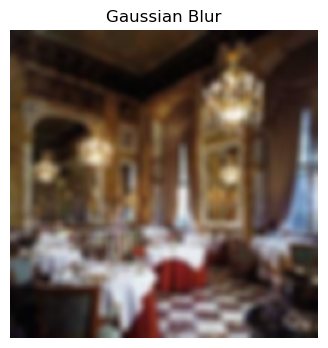

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa

image = cv2.imread('example_dataset/restaurant/0ME69J4QRCK2.jpg')  
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

augmentations = [
    iaa.Fliplr(1.0),        # Horizontal flip
    iaa.Flipud(1.0),        # Vertical flip
    iaa.Affine(rotate=25), # Rotate
    iaa.Multiply(1.2), # Change brightness
    iaa.GaussianBlur(sigma=3.0) # Gaussian blur
]

def apply_and_display(augmentation, title, image):
    augmented_image = augmentation(image=image)
    plt.figure(figsize=(4, 4))
    plt.imshow(augmented_image)
    plt.title(title)
    plt.axis('off')
    plt.show()

plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

titles = ['Horizontal Flip', 'Vertical Flip', 'Rotate', 'Change Brightness', 'Gaussian Blur']
for aug, title in zip(augmentations, titles):
    apply_and_display(aug, title, image)